# SOK-1006 Mikro

## Seminar 9

### Oppgave 1

### deloppgave b)

Kode her er basert på notebook 5 fra sok-1003 (Espen Sirnes).

In [65]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [66]:
def demand(x):
    return (2000/(50+x))

In [67]:
def supply(x):
    return x**2/300

In [68]:
x=sp.symbols('x', real=True, positive=True)
equ=sp.Eq(demand(x),supply(x))
equ

Eq(2000/(x + 50), x**2/300)

In [69]:
x_equ=sp.solve(equ,x)
x_equ

[-50/3 + 10*(-1/2 - sqrt(3)*I/2)*(50*sqrt(314)/3 + 7975/27)**(1/3) + 250/(9*(-1/2 - sqrt(3)*I/2)*(50*sqrt(314)/3 + 7975/27)**(1/3)),
 -50/3 + 250/(9*(-1/2 + sqrt(3)*I/2)*(50*sqrt(314)/3 + 7975/27)**(1/3)) + 10*(-1/2 + sqrt(3)*I/2)*(50*sqrt(314)/3 + 7975/27)**(1/3),
 -50/3 + 250/(9*(50*sqrt(314)/3 + 7975/27)**(1/3)) + 10*(50*sqrt(314)/3 + 7975/27)**(1/3)]

In [70]:
# siste element er eneste som ikke er et imaginært tall
x_eq=float(x_equ[2])
x_eq

70.54937160429131

In [71]:
p_eq=demand(x_eq)
p_eq

16.590712779201283

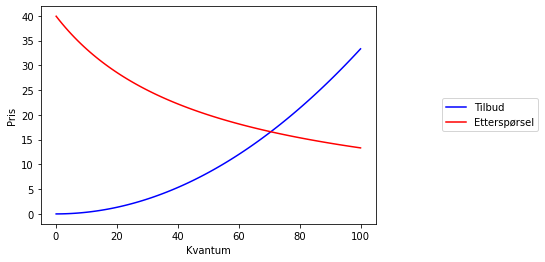

In [72]:
q = np.linspace(0.1,100,100)

fig,ax=plt.subplots()

ax.set_ylabel('Pris')
ax.set_xlabel('Kvantum')



ax.plot(q,supply(q), color='blue', label='Tilbud')


ax.plot(q,demand(q),color='red',label='Etterspørsel')


ax.legend(bbox_to_anchor=(1.5,0.6))

plt.show()

### deloppgave c)

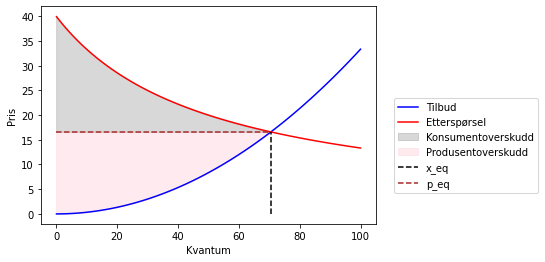

In [73]:
q = np.linspace(0,x_eq,100)
ax.fill_between(q,p_eq,demand(q), color = "gray",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,supply(q),p_eq, color = "pink",alpha = 0.3,label='Produsentoverskudd')
ax.vlines(x_eq,0,demand(x_eq), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq,0,x_eq, color='brown',ls='dashed', label='p_eq')
ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Hvorfor gir denne likevekten størst samfunnsøkonomisk overskudd? Tenk på hva som skjer om vi produserer litt under `x_eq`: etterspørselskurven viser samfunnets verdi av å produsere en ekstra enhet fra dette kvantumet, mens tilbudskurven (grensekostnad) viser hva samfunnet må betale for denne enheten. Til venstre for likevektskvantum er samfunnet villig til å betale mer enn det koster for den ekstra enheten, så den bør produseres. Argumentet gjentas inntil til kommer til `x_eq`. Tenk nå at vi har produsert mer enn `x_eq`. Samfunnets verdsetting på den siste enheten er lavere en samfunnets kostnad for å bringe den frem. Da kan overskudd økes ved å la være å produsere den siste enheten. Argumentet gjentas inntil vi kommer til `x_eq`. Vi kan derfor ikke bevege oss bort fra likevektspunktet og øke overskuddet, og dermed gir dette punktet størst samfunnsøkonomisk overskudd.

### deloppgave d)

In [74]:
producer_surplus=sp.integrate(p_eq-supply(x),(x,0,x_eq))
producer_surplus

780.309574026624

In [75]:
consumer_surplus=sp.integrate(demand(x)-p_eq,(x,0,x_eq))
consumer_surplus

589.608411852591

In [76]:
welfare_surplus=float(sp.integrate(demand(x)-supply(x),(x,0,x_eq)))
welfare_surplus

1369.917985879215

In [77]:
from IPython.display import Markdown

tbl=f"""
|                     | Verdi (kr)                                    |
| :-------------------| :----------------------------------------|
| Solgt mengde:       | ${np.round(float(x_eq),2)}$           |
| Pris:               | ${np.round(float(p_eq),2)}$              |
| Konsumentoverskudd: | ${np.round(float(consumer_surplus),2)}$ | 
| Produsentoverskudd: | ${np.round(float(producer_surplus),2)}$ | 
| Samfunnsøkonomisk overskudd:    | ${np.round(float(welfare_surplus),2)}$   | 
"""
display(Markdown(tbl))


|                     | Verdi (kr)                                    |
| :-------------------| :----------------------------------------|
| Solgt mengde:       | $70.55$           |
| Pris:               | $16.59$              |
| Konsumentoverskudd: | $589.61$ | 
| Produsentoverskudd: | $780.31$ | 
| Samfunnsøkonomisk overskudd:    | $1369.92$   | 
